In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from random import random, randrange, choice, choices, sample
from math import log

####1\. Выполнить генерацию случайного графа по модели Эрдёша-Реньи. Написать функцию для создания сети с использованием модели Эрдеша-Реньи.

Определить минимальные соотношения между количеством узлов и вероятностью их соединения, при которой все вершины связаны. Визуализировать граф.

Сеть (граф) Эрдеша-Реньи (ER-сеть) это такая сеть, когда каждая пара узлов соединена с вероятностью $p$. В пределе большого числа узлов $N$ функция распределения степеней узлов имеет вид:
$$P_k = e^{-k'}\frac{k'^k}{k!}$$

В пределе $N → ∞$ значение $k$ в построенной таким образом ER сети определено однозначно. В реальном случае для конечного значения числа узлов следует различать две модели ER сети – модель Гильберта (Gnp -модель) и собственно модель Эрдеша-Реньи (Gnm). В модели Gnm фиксируется вероятность $p$. Для сети с конечным значением узлов $N$ это означает, что $k = pN$ , при этом число связей $M$ определено только в среднем $M =\frac{pN(N−1)}{2}$.

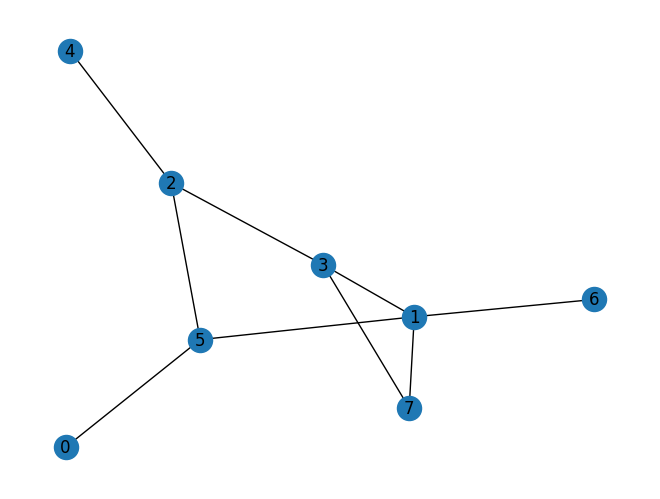

In [ ]:
g_1 = nx.erdos_renyi_graph(8, 0.25)
nx.draw(g_1, with_labels=True)

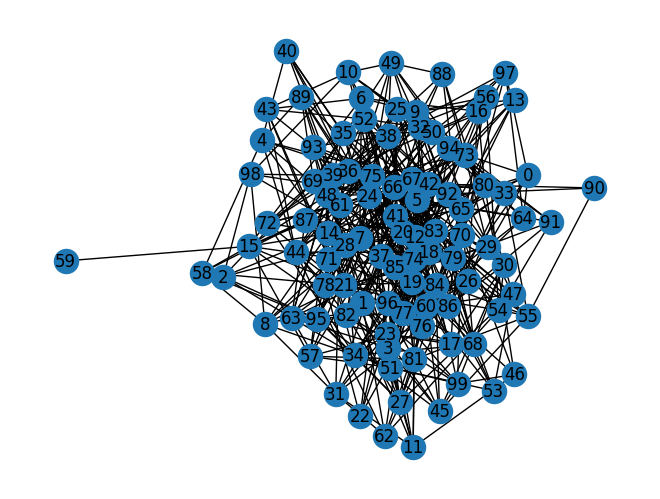

In [ ]:
def custom_erdos_renyi(n, p):
    g = nx.Graph()
    g.add_nodes_from([i for i in range(n)])
    for i in combinations(range(n), 2):
        if random() <= p:
            g.add_edge(i[0], i[1])
    return g

g_2 = custom_erdos_renyi(n=100, p=0.1)
nx.draw(g_2, with_labels=True)

In [ ]:
print(len(list(combinations(range(100), 2))))

4950


####2\. Создать граф с $n=100$, $p=0.1$.

Для произвольной вершины вывести <br>a) степень вершины, <br>b) список соседних вершин, <br>c) количество треугольников, в которые входит заданная вершина.

In [ ]:
node = randrange(100)

print(f'node {node} degree equals to {g_2.degree(node)}')
print(f'closest nodes for node {node} are : {list(g_2.neighbors(node))}')
print(f'numder of triangles that contain node {node} is {nx.triangles(g_2, node)}')

node 71 degree equals to 11
closest nodes for node 71 are : [5, 14, 34, 43, 45, 49, 63, 67, 78, 82, 86]
numder of triangles that contain node 71 is 2


####3\. Для двух произвольных вершин найдите кратчайшее расстояние и выведите кратчайший путь. Определить и вывести диаметр графа и степень кластеризации.


*Диаметр графа — это максимальное расстояние между любыми двумя его вершинами. Расстояние между двумя вершинами — наименьшее количество ребер в пути, концами которого являются эти вершины.*

In [ ]:
node_1 = randrange(100)
node_2 = randrange(100)

print(f'shortest path between {node_1} and {node_2} is {nx.shortest_path(g_2, node_1, node_2)}')
print(f'graph diameter equals to {nx.diameter(g_2)}')
print(f'average clustering equals to {nx.average_clustering(g_2)}')

shortest path between 40 and 60 is [40, 24, 60]
graph diameter equals to 4
average clustering equals to 0.10886520179167228


####4\. Вычислить и вывести степени узлов (см лаб.1), построить гистограмму распределения узлов, указать среднюю степень вершин.

In [ ]:
g_2.degree()

DegreeView({0: 8, 1: 8, 2: 6, 3: 11, 4: 8, 5: 15, 6: 8, 7: 14, 8: 9, 9: 13, 10: 9, 11: 8, 12: 11, 13: 6, 14: 13, 15: 11, 16: 5, 17: 7, 18: 17, 19: 8, 20: 14, 21: 15, 22: 5, 23: 7, 24: 22, 25: 11, 26: 8, 27: 9, 28: 12, 29: 6, 30: 11, 31: 9, 32: 12, 33: 8, 34: 11, 35: 9, 36: 12, 37: 13, 38: 12, 39: 14, 40: 6, 41: 15, 42: 14, 43: 7, 44: 11, 45: 9, 46: 5, 47: 7, 48: 11, 49: 10, 50: 13, 51: 11, 52: 10, 53: 6, 54: 8, 55: 9, 56: 7, 57: 8, 58: 6, 59: 1, 60: 10, 61: 12, 62: 7, 63: 12, 64: 7, 65: 13, 66: 14, 67: 12, 68: 8, 69: 11, 70: 11, 71: 11, 72: 8, 73: 14, 74: 14, 75: 14, 76: 8, 77: 11, 78: 9, 79: 14, 80: 10, 81: 9, 82: 12, 83: 14, 84: 11, 85: 9, 86: 13, 87: 9, 88: 7, 89: 7, 90: 3, 91: 6, 92: 13, 93: 9, 94: 9, 95: 13, 96: 15, 97: 7, 98: 6, 99: 9})

In [ ]:
print(f'average degree equals to {sum(dict(g_2.degree()).values()) / len(g_2.degree())}')

average degree equals to 10.0


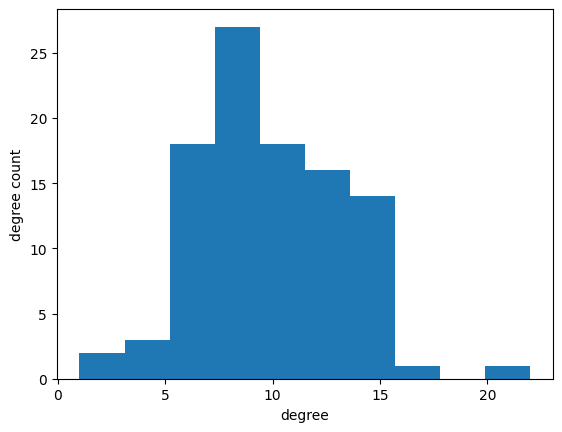

In [ ]:
plt.hist(dict(g_2.degree()).values())

plt.xlabel('degree')
plt.ylabel('degree count')
plt.show()

####5\. Выполнить определение связанных компонент в графе. <br>


*Компонент связности в графах — это максимальное подмножество вершин, каждая из которых связана с другими вершинами этого множества. То есть, внутри компоненты связности из любой вершины можно достигнуть любую другую вершину, двигаясь только по ребрам графа.*


In [ ]:
print(f'graph contains {len(list(nx.connected_components(g_2)))} component(s), here is the list of them: ')
print(list(nx.connected_components(g_2)))

graph contains 1 component(s), here is the list of them: 
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]


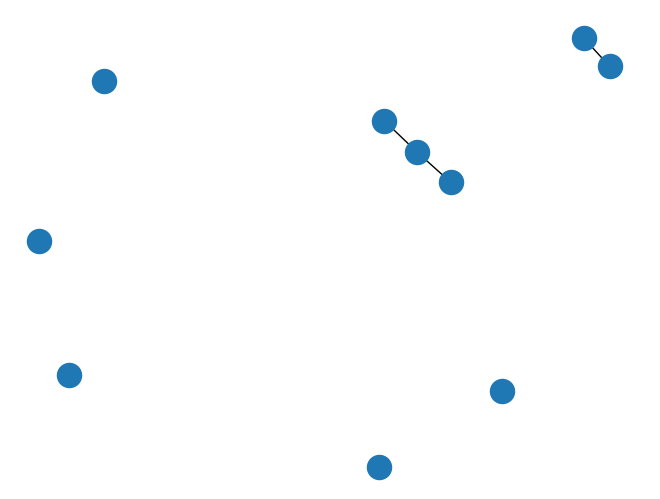

In [ ]:
g_5 = custom_erdos_renyi(10, 0.1)
nx.draw(g_5)

In [ ]:
print(list(nx.connected_components(g_5)))

[{0}, {1, 2, 5}, {9, 3}, {4}, {6}, {7}, {8}]


####6\. Выполнить проверку графа на фазовый переход: граф содержит несколько изолированных компонент, граф содержит одну связанную компоненту, граф не достиг фазового перехода.

Осуществить реализацию двух методов: с учетом числа связанных компонент и с учетом условия:
если  $p < \frac{1}{n}$ – граф содержит несколько изолированных компонент, если $p > \frac{ln(n)}{n}$ – граф содержит одну связанную компоненту, иначе граф не достиг фазового перехода.

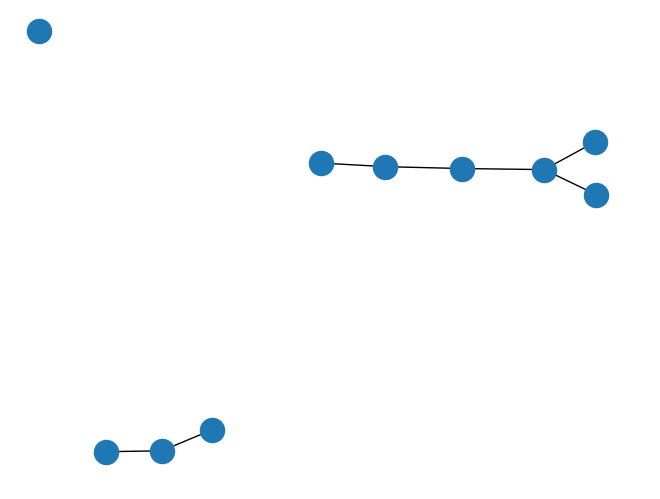

In [ ]:
gg = custom_erdos_renyi(10, 0.2)
nx.draw(gg)

In [ ]:
def transit_1(g):
    comp = list(nx.connected_components(g))
    lens = list(map(len, comp))
    if lens.count(1) >= 2 :
        print('graph contains two or more isolated components')
    elif len(lens) - lens.count(1) == 1:
        print('graph contains exactly one connected component')
    else:
        print("grap hasn't reached the phase transition")
    print(lens)

transit_1(gg)

grap hasn't reached the phase transition
[3, 1, 6]


In [ ]:
transit_1(g_2)

graph contains exactly one connected component
[100]


In [ ]:
def transit_2(g, p):
    if p < 1/len(g):
        print('graph contains several isolated components')
    elif p > log(len(g))/len(g):
        print('graph contains one connected component')
    else:
        print('screw you')

transit_2(g_2, 0.1)

graph contains one connected component


####7\. Реализуйте функцию для создания случайной сети с помощью модели Вильсона-Хопкрофта.


Сеть должна начинаться с одной вершины и постепенно увеличиваться путем добавления новых вершин и соединения их с существующими вершинами случайным образом. Визуализируйте результат.

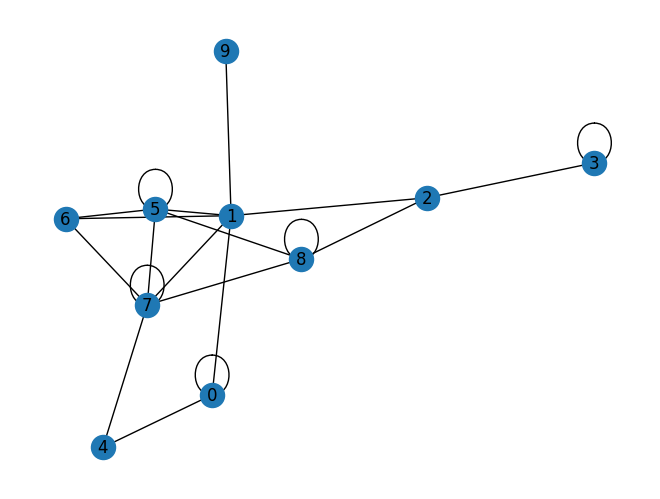

In [ ]:
def custom_vilson_hopkroft(n):
    G = nx.Graph()
    G.add_node(0)

    for i in range(n):
        G.add_node(i)
        chosen_nodes = choices(list(G.nodes()), k = round(random() * len(G)))
        G.add_edges_from(list(zip([i] * len(chosen_nodes), chosen_nodes)))

    return(G)

nx.draw(custom_vilson_hopkroft(10), with_labels=True)

####8\. Создайте программу для создания графа с использованием модели Барабаши-Альберта.

Начните с графа, содержащего $m_0$ вершин, где каждая вершина соединена с другими $m_{0-1}$ вершинами. Затем добавьте n новых вершин, каждая из которых соединена с m вершинами, пропорционально их степени. Визуализируйте полученный граф. Сравните свой результат со встроенным методом.

[4, 4, 4, 4, 4]
[4, 5, 4, 5, 5, 3]
[5, 6, 4, 6, 5, 3, 3]
[6, 7, 5, 7, 5, 3, 3, 4]
[6, 8, 6, 7, 6, 4, 4, 4, 5]
[7, 8, 7, 8, 7, 5, 4, 4, 5, 5]
[8, 9, 7, 8, 8, 6, 4, 4, 5, 5, 4]


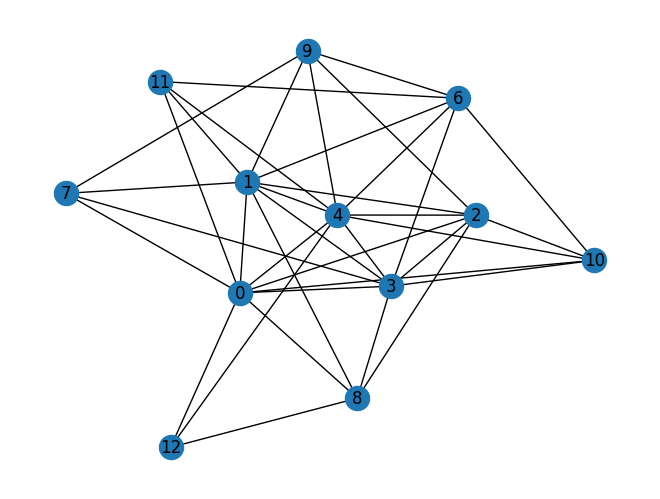

In [ ]:
def custom_barabashi_albert(m, n):
    G = nx.Graph()

    G.add_edges_from(combinations(range(m), 2))

    for i in range(m+1, m+n+1):
        weights = [degree for node, degree in G.degree()]
        print(weights)
        chosen_nodes = choices(list(G.nodes()), k=m, weights=weights)
        G.add_node(i)
        G.add_edges_from(list(zip([i] * len(chosen_nodes), chosen_nodes)))

    return G

nx.draw(custom_barabashi_albert(5, 7), with_labels=True)

####9\. Напишите функцию для создания случайной сети с использованием модели случайного роста сети. //см. задание 1))))//

Сеть должна начинаться с графа без рёбер и $N$ вершинами. Затем добавьте случайные рёбра между вершинами с вероятностью $p$. Визуализируйте полученную сеть.

####10\. Реализуйте функцию для создания случайной сети с использованием модели Ваттса-Строгатца.

Сеть начинается с регулярной решётки с $n$ вершинами и $m$ ближайшими соседями, а затем некоторые рёбра должны быть переподключены случайным образом с некоторой вероятностью $p$. Визуализируйте результат. Посчитайте среднюю длину связей.

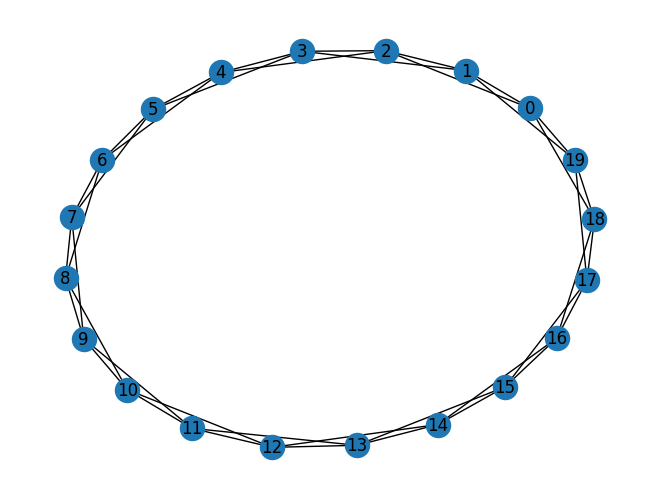

In [ ]:
def custom_watts_strogats(n, m, probability = 0.1):
    G = nx.Graph()

    for i in range(n):
        for j in range(1, m // 2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)

    nx.draw(G, with_labels=True)

    for edge in list(G.edges()):
        if random() <= probability:
            G.remove_edge(edge[0], edge[1])
            G.add_edge(choice(list(G.nodes())), choice(list(G.nodes())))

    return G

g_10 = custom_watts_strogats(20, 4, 0.5)
# nx.draw(g_10, with_labels=True)

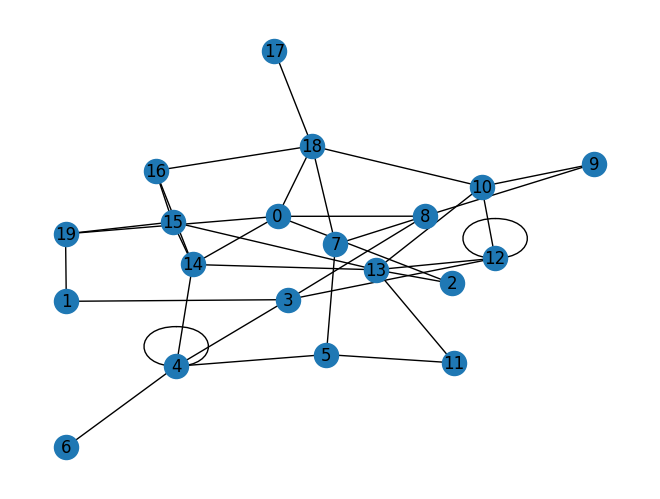

In [ ]:
nx.draw(g_10, with_labels=True)

In [ ]:
print(nx.average_shortest_path_length(g_10))

2.610526315789474
